In [175]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

assessors2012 = pd.read_csv("assessors2012.csv").dropna()
assessors2016 = pd.read_csv("assessors2016.csv").dropna()
joined = pd.merge(assessors2012, assessors2016, left_on="parloc_id", right_on="LOC_ID")

###First we import our data. Next, let's try to perform a join:

In [185]:
nonConRes = list(["101","103","104","105","106","107","108","109","111","112"])
pattern = '|'.join(nonConRes)
cconversions = joined[joined["luc_1"].str.contains(pattern) & joined["USE_CODE"].str.contains("102")]

|Land Use Code | Land Use |
|-------------:|---------:|
|101 | Single Family |
|102 | Condominium |
|103 | Mobile Home |
|104 | Two-Family |
|105 | Three-Family |
|106 | Accessory |
|109 | Multiple Households |
|111 | Four to Eight |
|112 | More than Eight |

As many as **22** units in Chelsea were converted to condos during the 4-year period between 2012 and 2016. Let's map it:


In [180]:
chelsea = gpd.GeoDataFrame.from_file("chelsea-assessors-2016.shp")

#Maps!

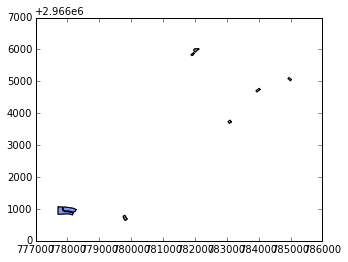

In [188]:
chelsea[chelsea["LOC_ID"].isin(cconversions["LOC_ID"])].plot()